<a href="https://colab.research.google.com/github/JamelJara/CS687_Spring2024/blob/main/CS687_Detection_Prediction_SkinCancerTypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Importing Important libraries
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [2]:
# @title Reading the Data
data = pd.read_csv("HAM10000_metadata.csv")
data.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('lesion_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('image_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('localization').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('lesion_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='lesion_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('image_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='image_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('localization')):
  _plot_series(series, series_name, i)
  fig.legend(title='localization', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('lesion_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='lesion_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['image_id'].value_counts()
    for x_label, grp in _df_12.groupby('lesion_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('lesion_id')
_ = plt.ylabel('image_id')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['localization'].value_counts()
    for x_label, grp in _df_13.groupby('image_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('image_id')
_ = plt.ylabel('localization')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['lesion_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='index', y='lesion_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['image_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='image_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['localization'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='localization', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['lesion_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='age', y='lesion_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
print("Cancer Types")
print(data.dx.unique(),"\n")

# Categorical data
encoderInfo = LabelEncoder()
data["dx_label"] = encoderInfo.fit_transform(data["dx"])

# Display of labels with integer encoding
print("Cancer types with their integer encoding")
print(encoderInfo.classes_, "\n")
print(encoderInfo.transform(encoderInfo.classes_))

Cancer Types
['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec'] 

Cancer types with their integer encoding
['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc'] 

[0 1 2 3 4 5 6]


In [4]:
data.head()

lesion_id      image_id   dx dx_type   age   sex localization  dx_label
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp         2
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp         2
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp         2
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp         2
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear         2

In [5]:
data.describe()

age      dx_label
count  9958.000000  10015.000000
mean     51.863828      4.182327
std      16.968614      1.458742
min       0.000000      0.000000
25%      40.000000      4.000000
50%      50.000000      5.000000
75%      65.000000      5.000000
max      85.000000      6.000000

from matplotlib import pyplot as plt
_df_18['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['dx_label'].plot(kind='hist', bins=20, title='dx_label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='age', y='dx_label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['dx_label'].plot(kind='line', figsize=(8, 4), title='dx_label')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='age', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='dx_label', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
data.groupby('sex').count()['lesion_id']

sex
female     4552
male       5406
unknown      57
Name: lesion_id, dtype: int64

In [7]:
data.groupby('dx').count()['lesion_id']

dx
akiec     327
bcc       514
bkl      1099
df        115
mel      1113
nv       6705
vasc      142
Name: lesion_id, dtype: int64

In [8]:
data.groupby('age').count()['localization']

age
0.0       39
5.0       86
10.0      41
15.0      77
20.0     169
25.0     247
30.0     464
35.0     753
40.0     985
45.0    1299
50.0    1187
55.0    1009
60.0     803
65.0     731
70.0     756
75.0     618
80.0     404
85.0     290
Name: localization, dtype: int64

In [9]:
data.groupby('localization').count()['dx_label']

localization
abdomen            1022
acral                 7
back               2192
chest               407
ear                  56
face                745
foot                319
genital              48
hand                 90
lower extremity    2077
neck                168
scalp               128
trunk              1404
unknown             234
upper extremity    1118
Name: dx_label, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dx_label      10015 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 626.1+ KB


In [11]:
data.shape

(10015, 8)

In [12]:
data.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dx_label         0
dtype: int64

In [13]:
data['age'].fillna((data['age'].mean()), inplace=True)

In [14]:
data.isna().sum().sum()

0

In [15]:
data.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dx_label        0
dtype: int64

In [16]:
data.sample(5)

lesion_id      image_id  dx    dx_type   age     sex     localization  \
3448  HAM_0006817  ISIC_0030269  nv  follow_up  65.0  female  upper extremity   
3064  HAM_0005252  ISIC_0028185  nv  follow_up  55.0    male  lower extremity   
8534  HAM_0000971  ISIC_0027671  nv      histo  25.0  female          unknown   
8803  HAM_0000302  ISIC_0032175  nv      histo  50.0  female  upper extremity   
3695  HAM_0006736  ISIC_0024492  nv  follow_up  60.0    male  lower extremity   

      dx_label  
3448         5  
3064         5  
8534         5  
8803         5  
3695         5

from matplotlib import pyplot as plt
_df_26['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('lesion_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_29.groupby('image_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_30.groupby('dx_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_31.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='index', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dx_label']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values('dx_label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('lesion_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='lesion_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dx_label')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dx_label']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_34.sort_values('dx_label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('image_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='image_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dx_label')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dx_label']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_35.sort_values('dx_label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dx_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='dx_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dx_label')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dx_label']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('dx_label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dx_label')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
_df_37['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['image_id'].value_counts()
    for x_label, grp in _df_39.groupby('lesion_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('lesion_id')
_ = plt.ylabel('image_id')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['dx_type'].value_counts()
    for x_label, grp in _df_40.groupby('image_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('image_id')
_ = plt.ylabel('dx_type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sex'].value_counts()
    for x_label, grp in _df_41.groupby('dx_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('dx_type')
_ = plt.ylabel('sex')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['localization'].value_counts()
    for x_label, grp in _df_42.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('localization')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_43['lesion_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_43, x='index', y='lesion_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_44['image_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_44, x='index', y='image_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_45['dx_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_45, x='index', y='dx_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_46['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_46, x='index', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [23]:
# @title Data Preprocessing

lesion_type = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
dir = 'drive/MyDrive/HAM10000_JJ'

In [18]:
print(os.listdir(os.getcwd()))

['.config', 'drive', '.ipynb_checkpoints', 'HAM10000_metadata.csv']


In [24]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(dir, '*.jpg'))}

In [ ]:
dir = ['drive/MyDrive/HAM10000_JJ']

In [21]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(dir[0], '*', '*.jpg'))}

In [26]:
print(imageid_path_dict)

{'ISIC_0033322': 'drive/MyDrive/HAM10000_JJ/ISIC_0033322.jpg', 'ISIC_0033327': 'drive/MyDrive/HAM10000_JJ/ISIC_0033327.jpg', 'ISIC_0033331': 'drive/MyDrive/HAM10000_JJ/ISIC_0033331.jpg', 'ISIC_0033332': 'drive/MyDrive/HAM10000_JJ/ISIC_0033332.jpg', 'ISIC_0033334': 'drive/MyDrive/HAM10000_JJ/ISIC_0033334.jpg', 'ISIC_0033328': 'drive/MyDrive/HAM10000_JJ/ISIC_0033328.jpg', 'ISIC_0033324': 'drive/MyDrive/HAM10000_JJ/ISIC_0033324.jpg', 'ISIC_0033329': 'drive/MyDrive/HAM10000_JJ/ISIC_0033329.jpg', 'ISIC_0033330': 'drive/MyDrive/HAM10000_JJ/ISIC_0033330.jpg', 'ISIC_0033325': 'drive/MyDrive/HAM10000_JJ/ISIC_0033325.jpg', 'ISIC_0033333': 'drive/MyDrive/HAM10000_JJ/ISIC_0033333.jpg', 'ISIC_0033338': 'drive/MyDrive/HAM10000_JJ/ISIC_0033338.jpg', 'ISIC_0033336': 'drive/MyDrive/HAM10000_JJ/ISIC_0033336.jpg', 'ISIC_0033347': 'drive/MyDrive/HAM10000_JJ/ISIC_0033347.jpg', 'ISIC_0033346': 'drive/MyDrive/HAM10000_JJ/ISIC_0033346.jpg', 'ISIC_0033340': 'drive/MyDrive/HAM10000_JJ/ISIC_0033340.jpg', 'ISIC_0

In [27]:
# @title Creating new columns for better understanding of features
data['path'] = data['image_id'].map(imageid_path_dict.get)
data['cell_type'] = data['dx'].map(lesion_type.get)
data['cell_type_idx'] = pd.Categorical(data['cell_type']).codes

data.head()


lesion_id      image_id   dx dx_type   age   sex localization  dx_label  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp         2   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp         2   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp         2   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp         2   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear         2   

                                         path                       cell_type  \
0  drive/MyDrive/HAM10000_JJ/ISIC_0027419.jpg  Benign keratosis-like lesions    
1  drive/MyDrive/HAM10000_JJ/ISIC_0025030.jpg  Benign keratosis-like lesions    
2  drive/MyDrive/HAM10000_JJ/ISIC_0026769.jpg  Benign keratosis-like lesions    
3  drive/MyDrive/HAM10000_JJ/ISIC_0025661.jpg  Benign keratosis-like lesions    
4  drive/MyDrive/HAM10000_JJ/ISIC_0031633.jpg  Benign keratosis-like lesions    

   cell_type_idx  
0              2  
1              2  
2              2  
3              2  
4              2

from matplotlib import pyplot as plt
_df_47['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_49.groupby('lesion_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_50.groupby('image_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_51.groupby('localization').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_52.groupby('path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53.plot(kind='scatter', x='index', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_54.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('lesion_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='lesion_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_55.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('image_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='image_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_56.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('localization')):
  _plot_series(series, series_name, i)
  fig.legend(title='localization', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_57.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('path')):
  _plot_series(series, series_name, i)
  fig.legend(title='path', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_58['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_59['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['image_id'].value_counts()
    for x_label, grp in _df_60.groupby('lesion_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('lesion_id')
_ = plt.ylabel('image_id')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['localization'].value_counts()
    for x_label, grp in _df_61.groupby('image_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('image_id')
_ = plt.ylabel('localization')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['path'].value_counts()
    for x_label, grp in _df_62.groupby('localization')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('localization')
_ = plt.ylabel('path')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_63['lesion_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_63, x='index', y='lesion_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_64['image_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_64, x='index', y='image_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_65['localization'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_65, x='index', y='localization', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_66['path'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_66, x='index', y='path', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [28]:
# @title checking bad values
data.isna().sum()


lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
dx_label         0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

In [29]:
data['image'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [30]:
data.isna().sum().sum()

0

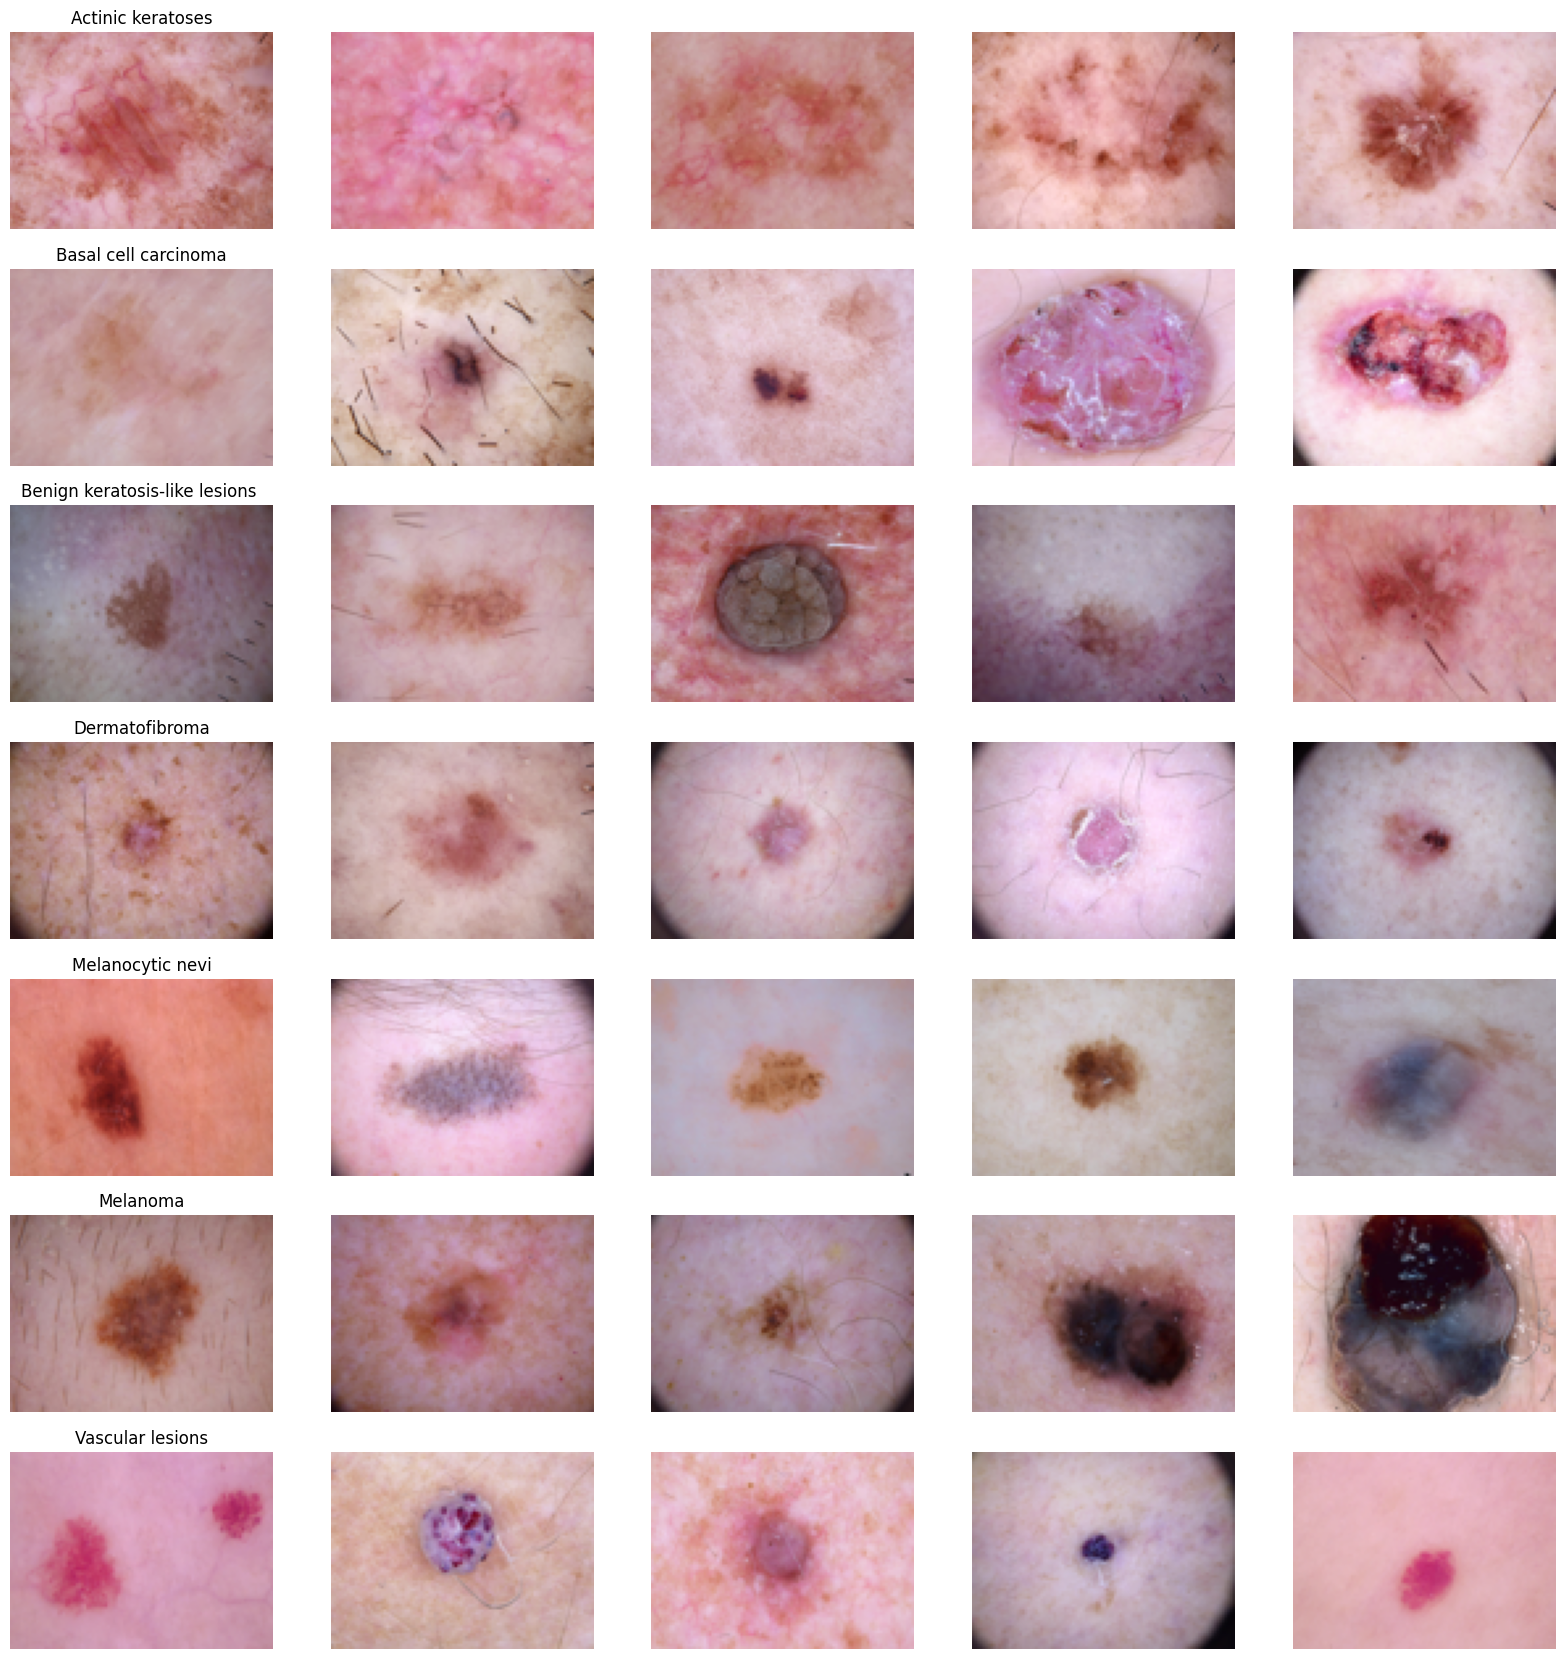

In [31]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [ ]:
data['image'].map(lambda x: x.shape).value_counts()

In [35]:
print(model)